In [1]:
import pandas as pd
%matplotlib inline

In [4]:
df = pd.read_csv('data/age_gap.csv')
df.head()

,Movie Name,Release Year,Director,Age Difference,Actor 1 Name,Actor 1 Gender,Actor 1 Birthdate,Actor 1 Age,Actor 2 Name,Actor 2 Gender,Actor 2 Birthdate,Actor 2 Age
0,Harold and Maude,1971,Hal Ashby,52,Bud Cort,man,1948-03-29,23,Ruth Gordon,woman,1896-10-30,75
1,Venus,2006,Michael Curtiz,50,Peter O'Toole,man,1932-08-02,74,Jodie Whittaker,woman,1982-06-03,24
2,The Quiet American,2002,Phillip Noyce,49,Michael Caine,man,1933-03-14,69,Do Thi Hai Yen,woman,1982-10-01,20
3,The Big Lebowski,1998,Joel Coen,45,David Huddleston,man,1930-09-17,68,Tara Reid,woman,1975-11-08,23
4,Beginners,2010,Mike Mills,43,Christopher Plummer,man,1929-12-13,81,Goran Visnjic,man,1972-09-09,38


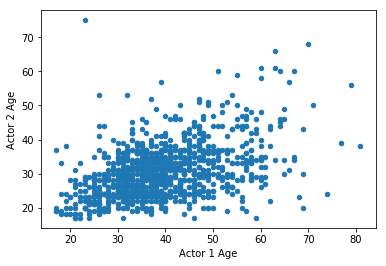

In [140]:
df.plot(kind='scatter', x='Actor 1 Age', y='Actor 2 Age')

In [37]:
## Create a new column for number of times a director appears on the list?

In [53]:
df_appearance = df.Director.value_counts().reset_index()
df_appearance.head()

,index,Director
0,Woody Allen,20
1,John Glen,15
2,Mike Newell,10
3,Terence Young,9
4,Mike Nichols,9


In [38]:
## Sum the age difference of each director

In [66]:
df_diff = df.groupby(by='Director')['Age Difference'].sum().sort_values().reset_index()
df_diff.head()

,Director,Age Difference
0,Chen Kaige,0
1,Tyler Perry,0
2,Jan de Bont,0
3,Jim Field Smith,0
4,Joe Johnston,1


In [71]:
## combine df_diff and df_appearance for comparison
## clean up column names, drop dupes

In [77]:
df_join = df_diff.merge(df_appearance, how='left', left_on='Director', right_on='index')

In [83]:
df_join.drop(['index'], axis=1, inplace=True)


In [86]:
df_join['appearance_total'] = df_join['Director_y']

In [88]:
df_join.drop(['Director_y'], axis=1, inplace=True)

In [91]:
## divide new column by sum and sort for highest average 
df_join.head()

,Director_x,Age Difference,appearance_total
0,Chen Kaige,0,1
1,Tyler Perry,0,1
2,Jan de Bont,0,1
3,Jim Field Smith,0,1
4,Joe Johnston,1,1


In [94]:
df_join['avg_diff'] = df_join['Age Difference']/ df_join['appearance_total']

In [148]:
df_join.sort_values(by='avg_diff', ascending=False).head(5)

,Director_x,Age Difference,appearance_total,avg_diff
418,Hal Ashby,52,1,52.0
398,Katt Shea,42,1,42.0
386,Jon Amiel,39,1,39.0
380,Irving Pichel,36,1,36.0
373,Sofia Coppola,34,1,34.0


In [150]:
df_dir_avg = df_join[df_join.appearance_total > 3].sort_values(by='avg_diff', ascending=False).head(5)

In [158]:
df_dir_avg.rename(columns={'Director_x': 'Director'}, inplace=True)

In [159]:
dir_list = df_dir_avg.Director.head(5).tolist()

In [160]:
df_top_dir = df[df.Director.isin(dir_list)]

In [161]:
df_top_dir.head()

,Movie Name,Release Year,Director,Age Difference,Actor 1 Name,Actor 1 Gender,Actor 1 Birthdate,Actor 1 Age,Actor 2 Name,Actor 2 Gender,Actor 2 Birthdate,Actor 2 Age,apperance
3,The Big Lebowski,1998,Joel Coen,45,David Huddleston,man,1930-09-17,68,Tara Reid,woman,1975-11-08,23,NaN
6,Whatever Works,2009,Woody Allen,40,Larry David,man,1947-07-02,62,Evan Rachel Wood,woman,1987-09-07,22,NaN
8,Husbands and Wives,1992,Woody Allen,38,Woody Allen,man,1935-12-01,57,Juliette Lewis,woman,1973-06-21,19,NaN
16,Wild Target,2010,Jonathan Lynn,34,Bill Nighy,man,1949-12-12,61,Emily Blunt,woman,1983-02-23,27,NaN
18,Hollywood Ending,2002,Woody Allen,33,Woody Allen,man,1935-12-01,67,Debra Messing,woman,1968-08-15,34,NaN


In [165]:
df_top_dir.drop('apperance', axis=1, inplace=True)

/Users/sabi/.pyenv/versions/3.6.5/lib/python3.6/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,Movie Name,Release Year,Director,Age Difference,Actor 1 Name,Actor 1 Gender,Actor 1 Birthdate,Actor 1 Age,Actor 2 Name,Actor 2 Gender,Actor 2 Birthdate,Actor 2 Age
3,The Big Lebowski,1998,Joel Coen,45,David Huddleston,man,1930-09-17,68,Tara Reid,woman,1975-11-08,23
6,Whatever Works,2009,Woody Allen,40,Larry David,man,1947-07-02,62,Evan Rachel Wood,woman,1987-09-07,22
8,Husbands and Wives,1992,Woody Allen,38,Woody Allen,man,1935-12-01,57,Juliette Lewis,woman,1973-06-21,19
16,Wild Target,2010,Jonathan Lynn,34,Bill Nighy,man,1949-12-12,61,Emily Blunt,woman,1983-02-23,27
18,Hollywood Ending,2002,Woody Allen,33,Woody Allen,man,1935-12-01,67,Debra Messing,woman,1968-08-15,34
19,Mighty Aphrodite,1995,Woody Allen,32,Woody Allen,man,1935-12-01,60,Mira Sorvino,woman,1967-09-28,28
23,Mighty Aphrodite,1995,Woody Allen,31,Woody Allen,man,1935-12-01,60,Helena Bonham Carter,woman,1966-05-26,29
24,A View to a Kill,1985,John Glen,30,Roger Moore,man,1927-10-14,58,Mary Stavin,woman,1957-08-20,28
25,For Your Eyes Only,1981,John Glen,30,Roger Moore,man,1927-10-14,54,Carole Bouquet,woman,1957-08-18,24
31,A View to a Kill,1985,John Glen,29,Roger Moore,man,1927-10-14,58,Fiona Fullerton,woman,1956-10-10,29


In [167]:
df_final = pd.merge(df_top_dir, df_dir_avg, on='Director', how='outer')

In [170]:
df_final

,Movie Name,Release Year,Director,Age Difference_x,Actor 1 Name,Actor 1 Gender,Actor 1 Birthdate,Actor 1 Age,Actor 2 Name,Actor 2 Gender,Actor 2 Birthdate,Actor 2 Age,Age Difference_y,appearance_total,avg_diff
0,The Big Lebowski,1998,Joel Coen,45,David Huddleston,man,1930-09-17,68,Tara Reid,woman,1975-11-08,23,95,5,19.000000
1,The Man Who Wasn't There,2001,Joel Coen,29,Billy Bob Thornton,man,1955-08-04,46,Scarlett Johansson,woman,1984-11-22,17,95,5,19.000000
2,The Big Lebowski,1998,Joel Coen,11,Jeff Bridges,man,1949-12-04,49,Julianne Moore,woman,1960-12-03,38,95,5,19.000000
3,Raising Arizona,1987,Joel Coen,6,Nicolas Cage,man,1964-01-07,23,Holly Hunter,woman,1958-03-20,29,95,5,19.000000
4,The Hudsucker Proxy,1994,Joel Coen,4,Tim Robbins,man,1958-10-18,36,Jennifer Jason Leigh,woman,1962-02-05,32,95,5,19.000000
5,Whatever Works,2009,Woody Allen,40,Larry David,man,1947-07-02,62,Evan Rachel Wood,woman,1987-09-07,22,403,20,20.150000
6,Husbands and Wives,1992,Woody Allen,38,Woody Allen,man,1935-12-01,57,Juliette Lewis,woman,1973-06-21,19,403,20,20.150000
7,Hollywood Ending,2002,Woody Allen,33,Woody Allen,man,1935-12-01,67,Debra Messing,woman,1968-08-15,34,403,20,20.150000
8,Mighty Aphrodite,1995,Woody Allen,32,Woody Allen,man,1935-12-01,60,Mira Sorvino,woman,1967-09-28,28,403,20,20.150000
9,Mighty Aphrodite,1995,Woody Allen,31,Woody Allen,man,1935-12-01,60,Helena Bonham Carter,woman,1966-05-26,29,403,20,20.150000


In [171]:
df_final.drop(['Age Difference_x', 'Age Difference_y'], axis=1, inplace=True)

In [190]:
df_final['avg_diff'] = df_final.avg_diff.round(0)

In [191]:
df_final

,Movie Name,Release Year,Director,Actor 1 Name,Actor 1 Gender,Actor 1 Birthdate,Actor 1 Age,Actor 2 Name,Actor 2 Gender,Actor 2 Birthdate,Actor 2 Age,appearance_total,avg_diff
0,The Big Lebowski,1998,Joel Coen,David Huddleston,man,1930-09-17,68,Tara Reid,woman,1975-11-08,23,5,19.0
1,The Man Who Wasn't There,2001,Joel Coen,Billy Bob Thornton,man,1955-08-04,46,Scarlett Johansson,woman,1984-11-22,17,5,19.0
2,The Big Lebowski,1998,Joel Coen,Jeff Bridges,man,1949-12-04,49,Julianne Moore,woman,1960-12-03,38,5,19.0
3,Raising Arizona,1987,Joel Coen,Nicolas Cage,man,1964-01-07,23,Holly Hunter,woman,1958-03-20,29,5,19.0
4,The Hudsucker Proxy,1994,Joel Coen,Tim Robbins,man,1958-10-18,36,Jennifer Jason Leigh,woman,1962-02-05,32,5,19.0
5,Whatever Works,2009,Woody Allen,Larry David,man,1947-07-02,62,Evan Rachel Wood,woman,1987-09-07,22,20,20.0
6,Husbands and Wives,1992,Woody Allen,Woody Allen,man,1935-12-01,57,Juliette Lewis,woman,1973-06-21,19,20,20.0
7,Hollywood Ending,2002,Woody Allen,Woody Allen,man,1935-12-01,67,Debra Messing,woman,1968-08-15,34,20,20.0
8,Mighty Aphrodite,1995,Woody Allen,Woody Allen,man,1935-12-01,60,Mira Sorvino,woman,1967-09-28,28,20,20.0
9,Mighty Aphrodite,1995,Woody Allen,Woody Allen,man,1935-12-01,60,Helena Bonham Carter,woman,1966-05-26,29,20,20.0


In [192]:
df_final.to_csv('top_directors.csv', index=False)